In [1]:
import time
import tqdm
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd
import torch 
import torch.nn as nn 
import torch.nn.functional as F 
import torch.optim as optim 
import torch.utils.data as utils
import torch.nn.init as init
from torch.autograd import Variable

In [2]:
pd.set_option('display.max_columns', None)  

In [3]:
mode = 'ROC'

In [4]:
f_rnd = pd.read_hdf("/data/t3home000/spark/QUASAR/preprocessing/conventional_tau_rnd.h5")

In [5]:
f_rnd.columns

Index(['Mjj', 'j1 pT', 'j2 pT', 'Mj1', 'j1 tau21', 'j1 tau32', 'j1 tau43',
       'j1 tau54', 'j1 tau65', 'j1 tau76', 'j1 tau87',
       'j1 sqrt(tau^2_1)/tau^1_1', 'j1 n_trk', 'j1 M_trim', 'j1 M_prun',
       'j1 M_mmdt', 'j1 M_sdb1', 'j1 M_sdb2', 'j1 M_sdm1', 'Mj2', 'j2 tau21',
       'j2 tau32', 'j2 tau43', 'j2 tau54', 'j2 tau65', 'j2 tau76', 'j2 tau87',
       'j2 sqrt(tau^2_1)/tau^1_1', 'j2 n_trk', 'j2 M_trim', 'j2 M_prun',
       'j2 M_mmdt', 'j2 M_sdb1', 'j2 M_sdb2', 'j2 M_sdm1', 'isSignal'],
      dtype='object')

In [6]:
if mode == 'ROC':
    dt = f_rnd.values
else:
    dt_PureBkg = f_PureBkg.values

In [7]:
f_rnd.head()

,Mjj,j1 pT,j2 pT,Mj1,j1 tau21,j1 tau32,j1 tau43,j1 tau54,j1 tau65,j1 tau76,j1 tau87,j1 sqrt(tau^2_1)/tau^1_1,j1 n_trk,j1 M_trim,j1 M_prun,j1 M_mmdt,j1 M_sdb1,j1 M_sdb2,j1 M_sdm1,Mj2,j2 tau21,j2 tau32,j2 tau43,j2 tau54,j2 tau65,j2 tau76,j2 tau87,j2 sqrt(tau^2_1)/tau^1_1,j2 n_trk,j2 M_trim,j2 M_prun,j2 M_mmdt,j2 M_sdb1,j2 M_sdb2,j2 M_sdm1,isSignal
0,2577.571899,1285.895950,1282.286017,98.677270,0.528903,0.788281,0.904471,0.881570,0.911651,0.869766,0.878583,4.241889,136.0,18.881765,9.797733,0.544032,9.797733,93.763971,0.000000,53.519023,0.668562,0.735745,0.755674,0.820585,0.886242,0.871922,0.865858,1.895988,128.0,42.162664,18.466533,18.466533,31.845136,42.162664,0.000000,0.0
1,3807.507389,1334.493332,1306.137883,584.595432,0.345626,0.463461,0.865982,0.892948,0.843223,0.939763,0.941340,1.069972,320.0,556.665923,562.607897,584.595432,584.595432,584.595432,584.595432,405.034096,0.264362,0.793461,0.830032,0.799293,0.884729,0.890205,0.934968,1.377217,348.0,395.226881,393.309512,405.034096,405.034096,405.034096,405.034096,0.0
2,1710.965414,1072.462085,678.557182,159.597526,0.677692,0.690707,0.695322,0.823351,0.861655,0.909383,0.933325,1.310040,332.0,144.351550,142.366275,160.536659,160.536659,160.536659,0.000000,113.768840,0.713481,0.922610,0.782783,0.771806,0.843528,0.897504,0.902637,1.887494,236.0,54.235070,41.967840,41.352112,51.721630,70.442364,-0.000003,0.0
3,2603.379037,1284.020224,1217.031950,515.237299,0.091038,0.784454,0.860716,0.887306,0.885916,0.950761,0.886242,1.102743,248.0,501.564320,506.727622,514.767435,514.767435,514.767435,514.767435,161.648798,0.727507,0.719564,0.870109,0.862819,0.890846,0.941229,0.924068,1.997360,352.0,81.842001,60.307703,60.307703,72.423677,84.480859,0.000003,0.0
4,3294.162200,1205.343324,1087.658980,142.420213,0.507714,0.522686,0.904070,0.908468,0.918753,0.928911,0.901751,1.853319,220.0,129.146700,36.160229,25.685066,133.248335,133.248335,0.000011,105.721163,0.344534,0.614579,0.863765,0.819546,0.893619,0.872585,0.906367,1.113248,204.0,103.456059,99.817788,103.456059,103.456059,103.456059,0.000008,1.0


In [8]:
correct = (dt[:,19]>0) & (dt[:, 4] > 0)& (dt[:, 5] > 0)& (dt[:, 6] > 0)& (dt[:, 7] > 0)& (dt[:, 8] > 0) & (dt[:, 20] > 0)& (dt[:, 21] > 0)& (dt[:, 22] > 0)& (dt[:, 23] > 0)& (dt[:, 24] > 0) & (dt[:, 25] > 0)& (dt[:, 26] > 0)



In [9]:
dt = dt[correct]

In [10]:
dt.shape

(1097897, 36)

In [11]:
for i in [4,5,6,7,8,9,10, 20, 21, 22, 23, 24, 25,26]:
    #X[:,i] = (X[:,i]-np.mean(X[:,i]))/np.std(X[:,i])
    dt[:,i] = ((dt[:,i]-np.min(dt[:,i]))/(np.max(dt[:,i])-np.min(dt[:,i])))

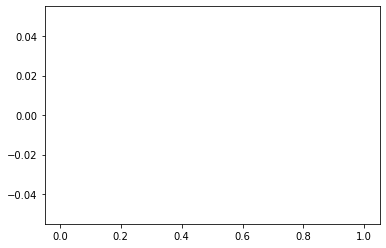

In [12]:
bins = np.linspace(0,1,101)
plt.hist(dt[:,27],bins,alpha=0.5,color='b');

In [13]:
for i in range(13,19):
    dt[:,i] = dt[:,i]/dt[:,3]

In [14]:
dt.shape

(1097897, 36)

In [15]:
for i in range(29,35):
    dt[:,i] = dt[:,i]/(dt[:,19])

In [16]:
f_rnd.columns[27]

'j2 sqrt(tau^2_1)/tau^1_1'

In [17]:
f_rnd.columns.get_loc("j2 tau21")


20

In [18]:
f_rnd.columns.get_loc('j1 M_sdm1')


18

In [19]:
idx = dt[:,-1]
bkg_idx = np.where(idx==0)[0]
sig_idx = np.where(idx==1)[0]

In [20]:
bkg_idx

array([      0,       1,       2, ..., 1097894, 1097895, 1097896])

In [21]:
np.max(dt[:,8])

1.0

In [22]:
np.min(dt[:,8])

0.0

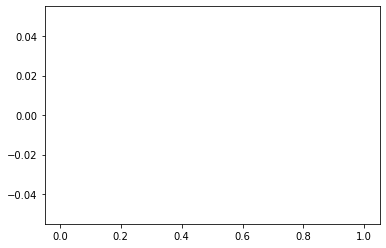

In [23]:
bins = np.linspace(0,1,101)
plt.hist(dt[:,1],bins,alpha=0.5,color='b');

In [24]:
for i in [11,27,12,28,3,19]:
    dt[:,i] = (dt[:,i]-np.min(dt[:,i]))/(np.max(dt[:,i])-np.min(dt[:,i]))

In [25]:
#dt[:,11] = (dt[:,11])/(0.2)

In [26]:
#dt[:,27] = (dt[:,27])/(0.12)

In [27]:
#dt[:,3] = (dt[:,3])/(0.44)

In [28]:
#dt[:,19] = (dt[:,19])/(0.44)

j1 M_sdm1


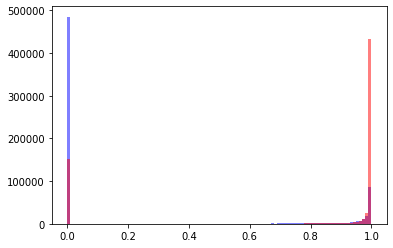

In [29]:
bins = np.linspace(0,1,101)
bins.shape
column = 18
print(f_rnd.columns[column])
plt.hist(dt[bkg_idx,column],bins,alpha=0.5,color='b');
plt.hist(dt[sig_idx,column],bins=bins,weights=np.ones(len(sig_idx))*10,alpha=0.5,color='r');

In [30]:
f_rnd.head()

,Mjj,j1 pT,j2 pT,Mj1,j1 tau21,j1 tau32,j1 tau43,j1 tau54,j1 tau65,j1 tau76,j1 tau87,j1 sqrt(tau^2_1)/tau^1_1,j1 n_trk,j1 M_trim,j1 M_prun,j1 M_mmdt,j1 M_sdb1,j1 M_sdb2,j1 M_sdm1,Mj2,j2 tau21,j2 tau32,j2 tau43,j2 tau54,j2 tau65,j2 tau76,j2 tau87,j2 sqrt(tau^2_1)/tau^1_1,j2 n_trk,j2 M_trim,j2 M_prun,j2 M_mmdt,j2 M_sdb1,j2 M_sdb2,j2 M_sdm1,isSignal
0,2577.571899,1285.895950,1282.286017,98.677270,0.528903,0.788281,0.904471,0.881570,0.911651,0.869766,0.878583,4.241889,136.0,18.881765,9.797733,0.544032,9.797733,93.763971,0.000000,53.519023,0.668562,0.735745,0.755674,0.820585,0.886242,0.871922,0.865858,1.895988,128.0,42.162664,18.466533,18.466533,31.845136,42.162664,0.000000,0.0
1,3807.507389,1334.493332,1306.137883,584.595432,0.345626,0.463461,0.865982,0.892948,0.843223,0.939763,0.941340,1.069972,320.0,556.665923,562.607897,584.595432,584.595432,584.595432,584.595432,405.034096,0.264362,0.793461,0.830032,0.799293,0.884729,0.890205,0.934968,1.377217,348.0,395.226881,393.309512,405.034096,405.034096,405.034096,405.034096,0.0
2,1710.965414,1072.462085,678.557182,159.597526,0.677692,0.690707,0.695322,0.823351,0.861655,0.909383,0.933325,1.310040,332.0,144.351550,142.366275,160.536659,160.536659,160.536659,0.000000,113.768840,0.713481,0.922610,0.782783,0.771806,0.843528,0.897504,0.902637,1.887494,236.0,54.235070,41.967840,41.352112,51.721630,70.442364,-0.000003,0.0
3,2603.379037,1284.020224,1217.031950,515.237299,0.091038,0.784454,0.860716,0.887306,0.885916,0.950761,0.886242,1.102743,248.0,501.564320,506.727622,514.767435,514.767435,514.767435,514.767435,161.648798,0.727507,0.719564,0.870109,0.862819,0.890846,0.941229,0.924068,1.997360,352.0,81.842001,60.307703,60.307703,72.423677,84.480859,0.000003,0.0
4,3294.162200,1205.343324,1087.658980,142.420213,0.507714,0.522686,0.904070,0.908468,0.918753,0.928911,0.901751,1.853319,220.0,129.146700,36.160229,25.685066,133.248335,133.248335,0.000011,105.721163,0.344534,0.614579,0.863765,0.819546,0.893619,0.872585,0.906367,1.113248,204.0,103.456059,99.817788,103.456059,103.456059,103.456059,0.000008,1.0


In [31]:
#X = dt[:,3:29]
# just the nsubjettiness
#X = np.concatenate((dt[:,3:13], dt[:,19:29]), axis=1

#X = dt[:,3:34]
#X = np.concatenate((dt[:,3:18], dt[:,19:34]), axis=1)

X = dt[:,3:34]

In [32]:
X.shape

(1097897, 31)

In [33]:
X.shape

(1097897, 31)

In [34]:
X[:,0] = (X[:,0]-np.mean(X[:,0]))/np.std(X[:,0])

In [45]:
for i in range(31):
    X[:,i] = (X[:,i]-np.mean(X[:,i]))/np.std(X[:,i])
    #X[:,i] = ((X[:,i]-np.min(X[:,i]))/(np.max(X[:,i])-np.min(X[:,i])))

Mjj


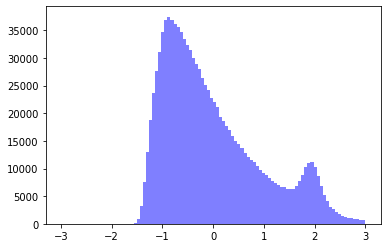

In [46]:
bins = np.linspace(-3,3,101)
bins.shape
column = 0
print(f_rnd.columns[column])
plt.hist(X[:,column],bins,alpha=0.5,color='b');
#plt.hist(dt[sig_idx,column],bins=bins,weights=np.ones(len(sig_idx))*10,alpha=0.5,color='r');

In [47]:
print(bkg_idx)

[      0       1       2 ... 1097894 1097895 1097896]


In [48]:
total_PureBkg = torch.tensor(X[bkg_idx])

total_PureBkg_selection = total_PureBkg

In [49]:
total_PureBkg_selection.shape

torch.Size([998007, 31])

In [50]:
bs = 1000
bkgAE_train_iterator = utils.DataLoader(total_PureBkg_selection, batch_size=bs, shuffle=True)
bkgAE_test_iterator = utils.DataLoader(total_PureBkg_selection, batch_size=bs)

In [51]:
class Encoder(nn.Module):
    ''' This the encoder part of VAE

    '''
    def __init__(self, z_dim):
        '''
        Args:
            input_dim: A integer indicating the size of input (in case of MNIST 28 * 28).
            hidden_dim: A integer indicating the size of hidden dimension.
            z_dim: A integer indicating the latent dimension.
        '''
        super().__init__()

        self.linear1 = nn.Linear(31, 30)
        self.linear2 = nn.Linear(30, 30)
        #self.linear3 = nn.Linear(30, 20)
        #self.linear4 = nn.Linear(20, 10)
        #self.linear5 = nn.Linear(60, 30)
        hidden_dim = 30
        self.mu = nn.Linear(hidden_dim, z_dim)
        self.var = nn.Linear(hidden_dim, z_dim)

    def forward(self, x):
        # x is of shape [batch_size, input_dim]
        x = F.leaky_relu(self.linear1(x))
        x = F.leaky_relu(self.linear2(x))
        #x = F.leaky_relu(self.linear3(x))
        #x = F.leaky_relu(self.linear4(x))
        #x = F.leaky_relu(self.linear5(x))

        #hidden = F.relu(self.linear(x))
        # hidden is of shape [batch_size, hidden_dim]
        
        z_mu = self.mu(x)
        # z_mu is of shape [batch_size, latent_dim]
        z_var = self.var(x)
        # z_var is of shape [batch_size, latent_dim]

        return z_mu, z_var


In [52]:
class Decoder(nn.Module):
    ''' This the decoder part of VAE

    '''
    def __init__(self, z_dim):
        '''
        Args:
            z_dim: A integer indicating the latent size.
            hidden_dim: A integer indicating the size of hidden dimension.
            output_dim: A integer indicating the output dimension (in case of MNIST it is 28 * 28)
        '''
        super().__init__()

        self.linear1 = nn.Linear(z_dim, 30)
        self.linear2 = nn.Linear(30, 30)
        #self.linear3 = nn.Linear(20, 30)
        #self.linear4 = nn.Linear(30, 40)
        #self.linear5 = nn.Linear(100, 160)
        self.out = nn.Linear(30, 1)

    def forward(self, x):
        # x is of shape [batch_size, latent_dim]
        x = F.leaky_relu(self.linear1(x))
        x = F.leaky_relu(self.linear2(x))
        #x = F.leaky_relu(self.linear3(x))
        #x = F.leaky_relu(self.linear4(x))
        #x = F.leaky_relu(self.linear5(x))

        #hidden = F.relu(self.linear(x))
        # hidden is of shape [batch_size, hidden_dim]

        #predicted = torch.sigmoid(self.out(x))
        predicted = self.out(x)
        #predicted is of shape [batch_size, output_dim]

        return predicted


In [40]:
class VAE(nn.Module):
    ''' This the VAE, which takes a encoder and decoder.

    '''
    def __init__(self, enc, dec):
        super().__init__()

        self.enc = enc
        self.dec = dec

    def forward(self, x):
        # encode
        z_mu, z_var = self.enc(x)

        # sample from the distribution having latent parameters z_mu, z_var
        # reparameterize
        std = torch.exp(z_var / 2)
        eps = torch.randn_like(std)
        x_sample = eps.mul(std).add_(z_mu)

        # decode
        predicted = self.dec(x_sample)
        return predicted, z_mu, z_var


In [41]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)
torch.cuda.get_device_name(0)

cuda:0


'GeForce RTX 2080 Ti'

In [55]:
# encoder
encoder = Encoder(30)

# decoder
decoder = Decoder(30)

# vae
model = VAE(encoder, decoder).to(device)

# optimizer
lr = 1e-6
optimizer = optim.Adam(model.parameters(), lr=lr)

In [56]:
print(model)
print(device)

VAE(
  (enc): Encoder(
    (linear1): Linear(in_features=1, out_features=30, bias=True)
    (linear2): Linear(in_features=30, out_features=30, bias=True)
    (mu): Linear(in_features=30, out_features=30, bias=True)
    (var): Linear(in_features=30, out_features=30, bias=True)
  )
  (dec): Decoder(
    (linear1): Linear(in_features=30, out_features=30, bias=True)
    (linear2): Linear(in_features=30, out_features=30, bias=True)
    (out): Linear(in_features=30, out_features=1, bias=True)
  )
)
cuda:0


In [57]:
def train():
    # set the train mode
    model.train()

    # loss of the epoch
    train_loss = 0

    for i, x in enumerate(bkgAE_train_iterator):
        # reshape the data into [batch_size, 784]
        x = x.float().cuda()

        # update the gradients to zero
        optimizer.zero_grad()

        # forward pass
        x_sample, z_mu, z_var = model(x)

        # reconstruction loss
        recon_loss = F.binary_cross_entropy(x_sample, x, size_average=False)

        # kl divergence loss
        kl_loss = 0.5 * torch.sum(torch.exp(z_var) + z_mu**2 - 1.0 - z_var)

        # total loss
        loss = recon_loss + kl_loss

        # backward pass
        loss.backward()
        train_loss += loss.item()

        # update the weights
        optimizer.step()

    return train_loss


In [58]:
def test():
    # set the evaluation mode
    model.eval()

    # test loss for the data
    test_loss = 0

    # we don't need to track the gradients, since we are not updating the parameters during evaluation / testing
    with torch.no_grad():
        for i, x in enumerate(bkgAE_test_iterator):
            # reshape the data
            #x = x.view(-1, 28 * 28)
            x = x.float().cuda()
            # forward pass
            x_sample, z_mu, z_var = model(x)

            # reconstruction loss
            recon_loss = F.binary_cross_entropy(x_sample, x, size_average=False)

            # kl divergence loss
            kl_loss = 0.5 * torch.sum(torch.exp(z_var) + z_mu**2 - 1.0 - z_var)

            # total loss
            loss = recon_loss + kl_loss
            test_loss += loss.item()

    return test_loss

In [67]:
best_test_loss = float('inf')

for e in range(1000):

    train_loss = train()
    test_loss = test()

    train_loss /= len(total_PureBkg_selection)
    test_loss /= len(total_PureBkg_selection)

    print(f'Epoch {e}, Train Loss: {train_loss:.6f}, Test Loss: {test_loss:.6f}')

    if best_test_loss > test_loss:
        best_test_loss = test_loss
        patience_counter = 1
        print("Saving model!")
        if mode == 'ROC':
            torch.save(model.state_dict(),"/data/t3home000/spark/QUASAR/weights/_bkg_vae_Vanilla_RND_conventionaltauswithmassratio_zdim3.h5")
        else:
            torch.save(model.state_dict(), "/data/t3home000/spark/QUASAR/weights/bkg_vae_Vanilla_PureBkg.h5")
    else:
        patience_counter += 1
        print("Not saving model!")

    if patience_counter > 10:
        print("Patience Limit Reached")
        break

Epoch 0, Train Loss: 0.694422, Test Loss: 0.694353
Saving model!
Epoch 1, Train Loss: 0.694312, Test Loss: 0.694240
Saving model!
Epoch 2, Train Loss: 0.694192, Test Loss: 0.694132
Saving model!
Epoch 3, Train Loss: 0.694086, Test Loss: 0.694034
Saving model!
Epoch 4, Train Loss: 0.693996, Test Loss: 0.693938
Saving model!
Epoch 5, Train Loss: 0.693898, Test Loss: 0.693851
Saving model!
Epoch 6, Train Loss: 0.693811, Test Loss: 0.693778
Saving model!
Epoch 7, Train Loss: 0.693734, Test Loss: 0.693686
Saving model!
Epoch 8, Train Loss: 0.693645, Test Loss: 0.693617
Saving model!
Epoch 9, Train Loss: 0.693573, Test Loss: 0.693534
Saving model!
Epoch 10, Train Loss: 0.693515, Test Loss: 0.693480
Saving model!
Epoch 11, Train Loss: 0.693451, Test Loss: 0.693416
Saving model!
Epoch 12, Train Loss: 0.693387, Test Loss: 0.693364
Saving model!
Epoch 13, Train Loss: 0.693338, Test Loss: 0.693315
Saving model!
Epoch 14, Train Loss: 0.693290, Test Loss: 0.693244
Saving model!
Epoch 15, Train Loss

In [ ]:
print(mode)

In [91]:
torch.save(model.state_dict(),"/data/t3home000/spark/QUASAR/weights/medianlearn_bkg_vae_Vanilla_RND_conventionaltauswithmassratio_zdim3.h5")

In [90]:
model.load_state_dict(torch.load("/data/t3home000/spark/QUASAR/weights/_bkg_vae_Vanilla_RND_conventionaltauswithmassratio_zdim3.h5"))

FileNotFoundError: [Errno 2] No such file or directory: '/data/t3home000/spark/QUASAR/weights/medianlearn_bkg_vae_Vanilla_RND_conventionaltauswithmassratio_zdim3.h5'

In [74]:
def get_loss(dt):
    print(dt.shape)
    
    #for i in index_list:
    #    print(i)
    #    dt[:,i] = (dt[:,i]-np.mean(dt[:,i]))/np.std(dt[:,i])
  
    
    total_in = torch.tensor(dt)
    #total_in_train_x_1 = total_in.t()[0:6].t()
    #total_in_train_x_3 = total_in.t()[7:13].t()
    total_in_selection = total_in
    #z_mu, z_var  = model.enc(total_in_selection.float().cuda())
    #x_sample, z_mu, z_var = model(total_in_selection.float().cuda())
    #std = torch.exp(z_var / 2)
    #eps = torch.randn_like(std)
    #x_sample = eps.mul(std).add_(z_mu)
    #decoded_bkg = model.dec(x_sample)
    #recon_loss = np.zeros(len(dt),dtype=np.float)
    #for i in range(len(dt)):
    #    recon_loss[i] = F.binary_cross_entropy(x_sample[i].float().cuda(), total_in_selection[i].float().cuda(), size_average=False).data.cpu().numpy()
    
    #loss_bkg = torch.mean((x_sample.float().cuda()-total_in_selection.float().cuda())**2,dim=1).data.cpu().numpy()


    
    with torch.no_grad():
         #reconstruction loss
        #x_sample, z_mu, z_var = model(total_in_selection.float().cuda())
        #recon_loss = F.binary_cross_entropy(x_sample, total_in_selection.float().cuda(), size_average=False, reduce=None)
        

        #kl divergence loss
        #kl_loss = 0.5 * torch.sum(torch.exp(z_var) + z_mu**2 - 1.0 - z_var)

        #total loss
        #loss = recon_loss + kl_loss
        loss = torch.mean((model(total_in_selection.float().cuda())[0]- total_in_selection.float().cuda())**2,dim=1).data.cpu().numpy()
    
    return loss

In [83]:
out = model(torch.tensor(X[bkg_idx]).float().cuda())[0]

In [84]:
out = out.data.cpu().numpy()

In [85]:
out.shape

(998007, 1)

In [86]:
X[:,0]

array([0.53089414, 0.34416556, 0.68248449, ..., 0.64950578, 0.48112917,
       0.46698525])

In [87]:
out[:,0]

array([0.4984136 , 0.5222034 , 0.5232027 , ..., 0.5128679 , 0.5205478 ,
       0.52101964], dtype=float32)

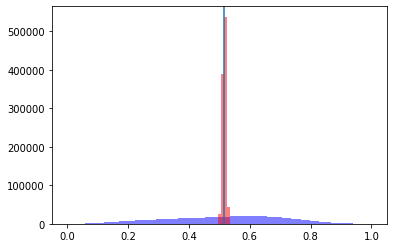

In [88]:
bins = np.linspace(0,1,100)
bins.shape
column = 0
#print(f_rnd.columns[column])
plt.hist(X[bkg_idx,column],bins,alpha=0.5,color='b');
plt.hist(out[:,column],bins,alpha=0.5,color='r');
plt.axvline(np.mean(X[bkg_idx,column]))

In [137]:
X[sig_idx].shape

(99890, 30)

In [138]:
loss_bkg = get_loss(X[bkg_idx])
loss_sig = get_loss(X[sig_idx])

(998007, 30)
(99890, 30)


In [139]:
len(loss_sig)

99890

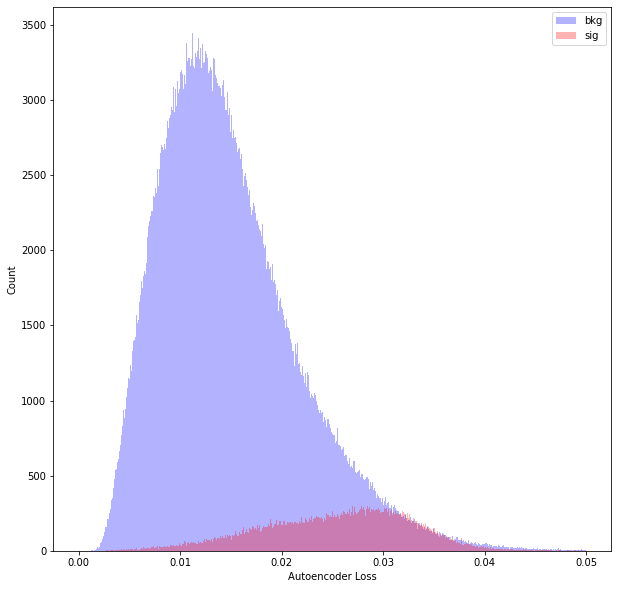

In [140]:
plt.rcParams["figure.figsize"] = (10,10)

bins = np.linspace(0,0.05,1000)
plt.hist(loss_bkg,bins=bins,alpha=0.3,color='b',label='bkg');
plt.hist(loss_sig,bins=bins,weights=np.ones(len(loss_sig))*1,alpha=0.3,color='r',label='sig');
plt.xlabel(r'Autoencoder Loss')
plt.ylabel('Count')
plt.legend(loc='upper right')
plt.show()

### ROC


In [63]:
def get_tpr_fpr(sigloss,bkgloss,aetype='bkg'):
    bins = np.linspace(0,0.05,1001)
    tpr = []
    fpr = []
    for cut in bins:
        if aetype == 'sig':
            tpr.append(np.where(sigloss<cut)[0].shape[0]/len(sigloss))
            fpr.append(np.where(bkgloss<cut)[0].shape[0]/len(bkgloss))
        if aetype == 'bkg':
            tpr.append(np.where(sigloss>cut)[0].shape[0]/len(sigloss))
            fpr.append(np.where(bkgloss>cut)[0].shape[0]/len(bkgloss))
    return tpr,fpr  

In [64]:
tpr, fpr = get_tpr_fpr(loss_sig,loss_bkg)

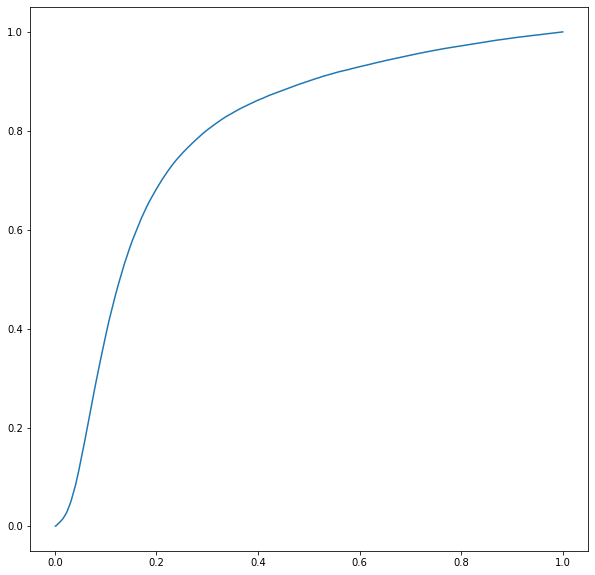

In [65]:
plt.plot(fpr,tpr)

In [ ]:
np.save('VanillaVAE_conventionaltau_zdim3_sigloss.npy',loss_sig)
np.save('VanillaVAE_conventionaltau_zdim3_bkgloss.npy',loss_bkg)

### PRECISION - RECALL

In [ ]:
def get_precision_recall(sigloss,bkgloss,aetype='bkg'):
    bins = np.linspace(0,2,1001)
    tpr = []
    fpr = []
    precision = []
    for cut in bins:
        if aetype == 'sig':
            tpr.append(np.where(sigloss<cut)[0].shape[0]/len(sigloss))
            precision.append((np.where(sigloss<cut)[0].shape[0])/(np.where(bkgloss<cut)[0].shape[0]+np.where(sigloss<cut)[0].shape[0]))
            
        if aetype == 'bkg':
            tpr.append(np.where(sigloss>cut)[0].shape[0]/len(sigloss))
            precision.append((np.where(sigloss>cut)[0].shape[0])/(np.where(bkgloss>cut)[0].shape[0]+np.where(sigloss>cut)[0].shape[0]))
    return precision,tpr      

In [ ]:
prec, rec = get_precision_recall(loss_sig,loss_bkg)

In [ ]:
plt.plot(rec,prec)

In [ ]:
jnm